<a href="https://colab.research.google.com/github/MayankDw/EvolutionaryDeepLearning/blob/main/EDL_2_1_Conways_Game_of_Life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup for rendering output to a video file.

In [2]:
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt
print('starting to run this file')
def show_video():
  mp4list = glob.glob('*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")


starting to run this file


The single function for the Game of Life

In [3]:
import numpy as np
import tqdm.notebook as nb

def life(X, steps):
    """
     Conway's Game of Life.
     - X, matrix with the initial state of the game.
     - steps, number of generations.
     - original source from https://dzone.com/articles/game-of-life-with-python-1
    """
    def roll_it(x, y):
        # rolls the matrix X in a given direction
        # x=1, y=0 on the left;  x=-1, y=0 right;
        # x=0, y=1 top; x=0, y=-1 down; x=1, y=1 top left; ...
        return np.roll(np.roll(X, y, axis=0), x, axis=1)
    for _ in range(steps):
        # count the number of neighbours
        # the universe is considered toroidal
        Y = roll_it(1, 0) + roll_it(0, 1) + roll_it(-1, 0) \
            + roll_it(0, -1) + roll_it(1, 1) + roll_it(-1, -1) \
            + roll_it(1, -1) + roll_it(-1, 1)
        # game of life rules
        X = np.logical_or(np.logical_and(X, Y ==2), Y==3)
        X = X.astype(int)
        yield X

Creating our starting environment/map

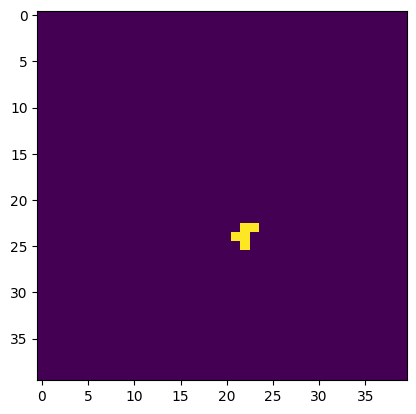

In [13]:
X = np.zeros((40, 40)) # 40 by 40 dead cells
# R-pentomino
X[23, 22:24] = 1
X[24, 21:23] = 1
X[25, 22] = 1
plt.imshow(X)
plt.show()

Creating the video renderer and then playing the game...

In [14]:
from matplotlib import pyplot as plt
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Game of life', artist='JustGlowing')
writer = FFMpegWriter(fps=10, metadata=metadata)
fig = plt.figure()
fig.patch.set_facecolor('black')
with writer.saving(fig, "game_of_life.mp4", 200):
    plt.spy(X)
    plt.axis('off')
    writer.grab_frame()
    plt.clf()
    for x in nb.tqdm(life(X, 800),total=800):
        plt.spy(x)
        plt.axis('off')
        writer.grab_frame()
        plt.clf()

  0%|          | 0/800 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

Displaying the output results as a video

In [15]:
show_video()